In [1]:
import tensorflow as tf
import cv2
import numpy as np

In [2]:
def mousecall(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        zoomin(x,y)
        
    elif event == cv2.EVENT_RBUTTONDBLCLK:
        zoomout()

def mousenone(event,x,y,flags,param):

    return 0
    
def zoomin(x,y):
    
    cv2.setMouseCallback('frame', mousenone)
    
    while(True):
        ret, img = cap.read()
    
        x1 = x - 160
    
        if x1 < 0:
            x1 = 0
    
        x2 = x + 160
    
        if x2 > 640:
            x2 = 640
        
        y1 = y - 96
    
        if y1 < 0:
            y1 = 0
    
        y2 = y + 96
        
        if y2 > 480:
            y2 = 480
    
        pts1 = np.float32([[x1,y1],[x2,y1],[x1,y2],[x2,y2]])
        pts2 = np.float32([[0,0],[320,0],[0,192],[320,192]])

        M = cv2.getPerspectiveTransform(pts1,pts2)

        dst = cv2.warpPerspective(img,M,(320,192))
            
        cv2.imshow('frame',dst)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            zoomout()
            break

def zoomout():
    
    ret, img = cap.read()
    
    cv2.imshow('frame',img)
    
#####    
cap = cv2.VideoCapture(0)

cv2.namedWindow('frame',cv2.WINDOW_NORMAL)
cv2.resizeWindow('frame',640,480)

count = 1

while(True):
    
    cv2.setMouseCallback('frame', mousecall)
    ret, frame = cap.read()

    cv2.imshow('frame',frame)
    
    # print("a")
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    elif cv2.waitKey(1) & 0xFF == ord('s'):
        cv2.imwrite('Orig.png', frame)
        print('Orig Save')

### PROGRAM ENDS HERE ####################

cap.release()
cv2.destroyAllWindows()

In [21]:
def live_video(camera_port=0, analyzer = None):
        """
        Opens a window with live video.
        :param camera:
        :return:
        """
        
        cv2.namedWindow('frame',cv2.WINDOW_NORMAL)
        cv2.resizeWindow('frame',640,480)
        video_capture = cv2.VideoCapture(camera_port)
        f = None
        while True:
            
            cv2.setMouseCallback('frame', mousecall)
            # Capture frame-by-frame
            ret, frame = video_capture.read()
            
            # Display the resulting frame
            cv2.imshow('Video', frame)

            if cv2.waitKey(1) & 0xFF == ord('s'):
                capturedFrames.append(frame)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                f = frame
                break

        # When everything is done, release the capture
        video_capture.release()
        cv2.destroyAllWindows()
        return f

In [22]:
capturedFrames = []
last_frame = live_video()
#img = cv2.imread("./img/18.png")

#cv2.imshow("img", img); cv2.waitKey(0); cv2.destroyAllWindows()

error: OpenCV(4.2.0) /io/opencv/modules/highgui/src/window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [5]:
len(capturedFrames)

4

In [83]:
import matplotlib.pyplot as plt

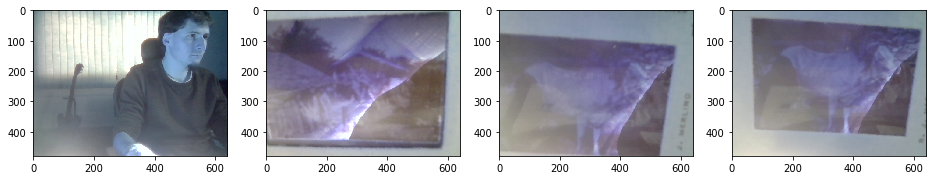

In [17]:
# last_frame =
plt.figure(figsize=(16,16))
for i in range(len(capturedFrames)):
    plt.subplot(4,4,i+1)
    plt.imshow(capturedFrames[i], cmap=plt.cm.Accent)

In [62]:
last_frame.shape

(480, 640, 3)

In [6]:
flat_last_frame = last_frame.flatten()

NameError: name 'last_frame' is not defined

In [5]:
flat_last_frame = flat_last_frame + 0
# np.random.shuffle(flat_last_frame)
flat_last_frame = flat_last_frame.reshape(480, 640, 3)
plt.imshow(flat_last_frame)
# flat_last_frame

NameError: name 'flat_last_frame' is not defined

In [164]:
from tensorflow import keras, image, io
from tensorflow.keras import layers, models


In [165]:
IMG_WIDTH = 300
IMG_HEIGHT = 200
DIAPOS = 2

 

classificator = models.Sequential([
   layers.Conv2D(IMG_WIDTH, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
   layers.MaxPool2D((2, 2)),
   layers.Dense(DIAPOS, activation='softmax')
])


In [166]:
import glob
files = glob.glob("./img/*.png")
files


['./img/18.png', './img/14.png']

In [167]:
#resize images
resized_imgs = []

for f in files:
    name = f.split("/")[-1]
    print(name)
    img = io.read_file(f)
    img = io.decode_png(img, channels=3)
    
    img = image.resize(img, [100, 200])/255
    img = image.convert_image_dtype(img, dtype=tf.uint8)
    print(img.dtype)
    img = image.encode_png(img)
    _ = io.write_file("./resized_img/"+name, img)


18.png
<dtype: 'uint8'>
14.png
<dtype: 'uint8'>


In [168]:
files = glob.glob("./resized_img/*.png")
files

['./resized_img/18.png', './resized_img/14.png']

In [169]:
# data augmentation

def variator(file, f, variations = 5, _min = 0.1, _max = 0.9):
    adjusts = np.linspace(_min, _max, variations)
    
    for v in adjusts:
        i = f(img, v)
        _imgs.append(i)
        _imgs.append(image.flip_left_right(i))
        _labels.append(file); _labels.append(file)
    
    # print(len(_imgs))
    return _imgs

In [174]:
# addind the augmented images corpus
_imgs = []

# creating the labels
_labels = []
for f in files:
    print(f)
    img = io.read_file(f)
    img = io.decode_png(img, channels=3)
    # img = img / 255
    
    #plt.imshow(img)
    _labels.append(f)   
    _imgs.append(img)
    # variations
    #variator(f, image.adjust_brightness, 2, 0.3, 0.8)
    #variator(f, image.adjust_contrast, 2, 0.3, 0.8)
    #variator(f, image.adjust_gamma, 2, 0.2, 0.9)
    #variator(f, image.adjust_saturation, 2, 0.2, 0.9)
    #variator(f, image.adjust_hue, 2, -0.9, 0.9)
    variator(f, image.adjust_jpeg_quality, 6, 0, 40)
imgs_nd = np.array(_imgs)
imgs_nd.shape
#imgs_nd

./resized_img/18.png
./resized_img/14.png


(26, 100, 200, 3)

In [175]:
 assert len(_labels) == len(_imgs)

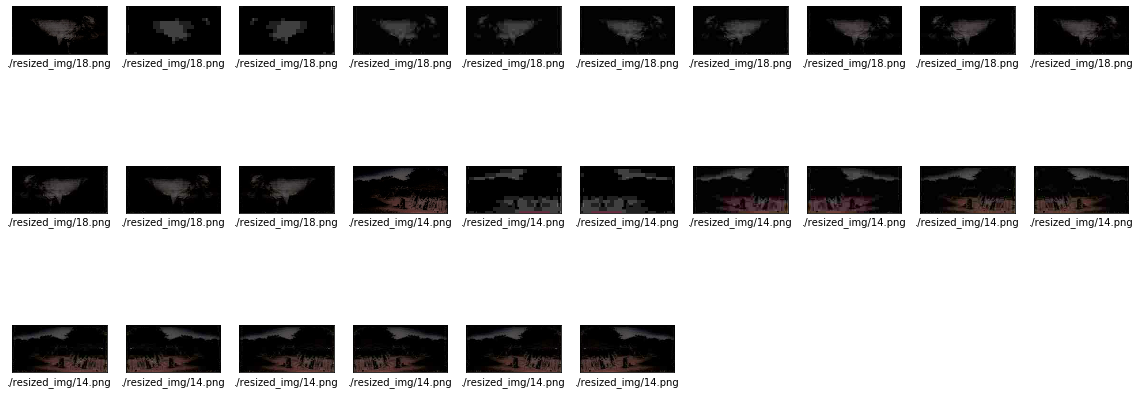

In [176]:
plt.figure(figsize=(20,20))
for i in range(len(imgs_nd)):
    plt.subplot(7,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgs_nd[i])
    plt.xlabel(_labels[i])


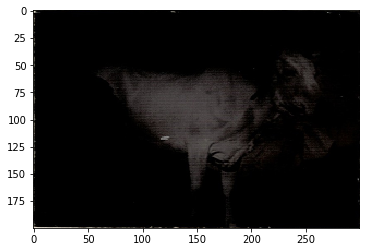

In [97]:
im = img = image.resize(_imgs[0]/255, [IMG_HEIGHT, IMG_WIDTH])
plt.imshow(im)

In [33]:
200*1.4545

290.9